# Forward Euler Method

Consider an ODE for $h(t)$:

$A\dfrac{dh}{dt} = q_i(t) - \frac{1}{R} h$

$h(t=0)=h_0$.

$R$ and $A$, resistance to flow and area of tank from helicopter view, are constant.

Forward Euler's method using time step $\Delta t$ gives for $h_{i} \approx h(i\Delta t)$:

$h_{i+1}=h_i + f(h_i, t_i) \Delta t$ for $i=0,1,...$

where $f(h,t):= [q_i(t) - \frac{1}{R} h]/A$ and $t_i = i \Delta t$.

## Define parameters

In [1]:
N = 1000 # number of time steps
Δt = 0.01 # time step
R = 2.0 # resistance to flow (min/s²)
A = 2.0 # area of tank (m²)
h₀ = 0.0 # initial liq. level, m
qᵢ(t) = 0.1 # m³/s

qᵢ (generic function with 1 method)

In [2]:
f(h, t) = (qᵢ(t) - h / R) / A

f (generic function with 1 method)

## March forward in time using recurrence relation

Store times in this array

In [3]:
ts = [i * Δt for i = 0:N];

Store h's in this array

In [4]:
hs = zeros(N + 1)
hs[1] = h₀;

Take time steps

In [5]:
for i = 1:N
    hs[i + 1] = hs[i] + f(hs[i], ts[i]) * Δt
end

Plot solution

In [6]:
using PyPlot # plotting library

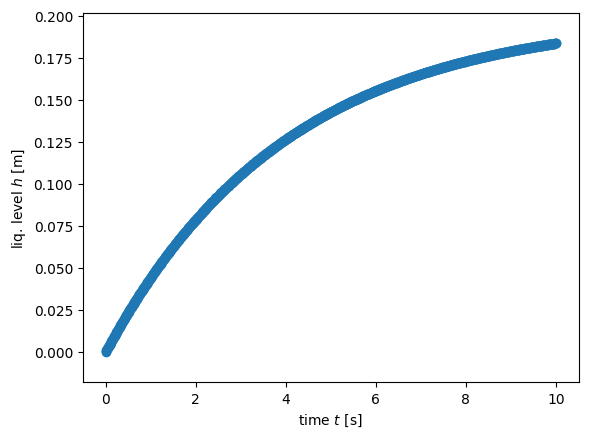

PyObject Text(28.000000000000014, 0.5, 'liq. level $h$ [m]')

In [7]:
figure()
scatter(ts, hs)
xlabel("time \$t\$ [s]")
ylabel("liq. level \$h\$ [m]")

## A general function for Forward Euler

In [8]:
function forward_euler(f::Function, Δt::Float64, N::Int, h₀::Float64)
    # define time array
    ts = [i * Δt for i = 0:N]
    
    # allocate memory for numerical solution to h
    hs = zeros(N + 1)
    
    # record initial condition
    hs[1] = h₀;
    
    # take time steps
    for i = 1:N
        hs[i + 1] = hs[i] + f(hs[i], ts[i]) * Δt
    end
    
    # return solution
    return ts, hs
end

forward_euler (generic function with 1 method)

## Compare to an exact solution

\begin{equation}
\dfrac{dh}{dt} = -h \\
h(t = 0) = 1
\end{equation}

The exact solution is $h(t)=e^{-t}$.

Let's get the numerical approximation to the solution first.

Try $\Delta t$ 0.1, 0.01, 1.5, inspired by [these notes](https://math.la.asu.edu/~dajones/class/275/ch2.pdf).

In [9]:
f(h, t) = -h
Δt = 1.5
N = ceil(Int, 6.0 / Δt)
h₀ = 1.0

ts, hs_approx = forward_euler(f, Δt, N, h₀);

Now the exact solution for comparision

In [10]:
hs_exact = exp.(-ts);

Plot to compare.

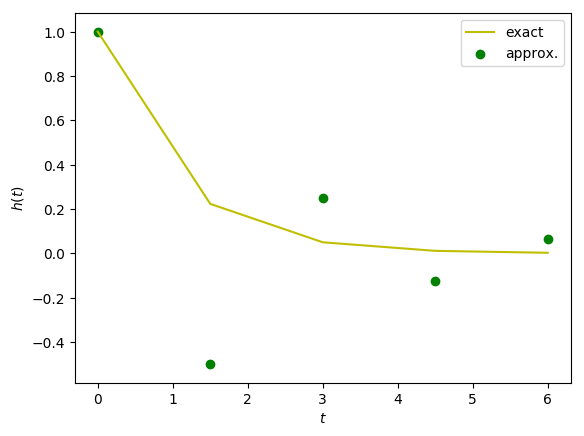

PyObject Text(26.0, 0.5, '$h(t)$')

In [11]:
figure()
scatter(ts, hs_approx, label="approx.", color="g")
plot(ts, hs_exact, label="exact", color="y")
legend()
xlabel("\$t\$")
ylabel("\$h(t)\$")